## 2. Analysis of Genres

We want to see whether the genres between movies have an affect on average box office earnings.

If so, we want to see which genres lead to the biggest earnings.

This will allow us to narrow down which genres are most popular.

In [22]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
import scipy.stats as stats
from matplotlib.ticker import PercentFormatter

In [23]:
# File to Load
movie_data = "Movie_Data.csv"

# Read the Movie Data
movie = pd.read_csv('Movie_Data.csv')

# Display the data table for preview
movie.head()

,IMDb ID,Title,Runtime (mins),Year,Genres,Release Date,IMDb Rating,Metascore,Rating,Box Office
0,tt1872181,The Amazing Spider-Man 2,142,2014,"Action, Adventure, Sci-Fi",4/10/2014,6.6,53,PG-13,183277573
1,tt1323594,Despicable Me,95,2010,"Animation, Comedy, Family, Fantasy",6/20/2010,7.7,72,PG,251476985
2,tt1375670,Grown Ups,102,2010,Comedy,6/24/2010,6.0,30,PG-13,162001186
3,tt0892769,How to Train Your Dragon,98,2010,"Animation, Action, Adventure, Family, Fantasy",3/18/2010,8.1,74,PG,216900000
4,tt1375666,Inception,148,2010,"Action, Adventure, Sci-Fi, Thriller",7/8/2010,8.8,74,PG-13,292568851


In [24]:
#Extract relevant columns
movie = movie[['Genres', 'Box Office', 'Year']]
movie.head()

,Genres,Box Office,Year
0,"Action, Adventure, Sci-Fi",183277573,2014
1,"Animation, Comedy, Family, Fantasy",251476985,2010
2,Comedy,162001186,2010
3,"Animation, Action, Adventure, Family, Fantasy",216900000,2010
4,"Action, Adventure, Sci-Fi, Thriller",292568851,2010


In [25]:
# Create a genre set containing genre types
# Split genres in Genres column using a delimeter
# Looping statement and add genre to the genre set unless already present 
genre_set = set()
for row in movie['Genres'].str.split(", "):
    for genre in row:
        if genre not in genre_set:
            genre_set.add(genre)    

In [26]:
# A list containing genres
genre_set = list(genre_set)

In [27]:
# Create box office success list; y-value
# Looping statement and mean of each genre
averages_list = []
for genre in genre_set:
    mask = movie["Genres"].str.contains(f'{genre}')==True
    avg = movie[mask]["Box Office"].mean()
    averages_list.append(avg)   

In [28]:
# Covert Box Office to millions
averages_list = [x/1000000 for x in averages_list]
averages_list

[122.88188585526316,
 113.4111595549133,
 29.383784037313433,
 138.4912569032258,
 42.21486465384615,
 129.59390039215688,
 25.05508141860465,
 22.54826979761905,
 61.16326675,
 35.3096476626506,
 95.066479,
 52.621246884514434,
 2.98926508,
 46.52079175884245,
 115.78014762727273,
 51.67360983636364,
 26.34676623214286,
 111.68704716666667,
 57.635095642857145,
 35.24443222767857,
 42.86875228703704,
 0.061153]

In [29]:
# Show Genres; x-value
genre_set

['Sci-Fi',
 'Fantasy',
 'Drama',
 'Animation',
 'Sport',
 'Adventure',
 'History',
 'Biography',
 'War',
 'Crime',
 'Action',
 'Comedy',
 'Documentary',
 'Thriller',
 'Family',
 'Music',
 'Horror',
 'Musical',
 'Western',
 'Romance',
 'Mystery',
 'News']

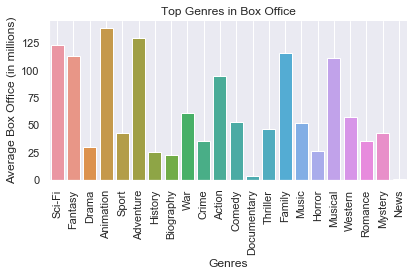

In [30]:
# Bar Chart to identify top Genres
sns.barplot(genre_set, averages_list)
sns.despine()
plt.xticks(rotation=90);

# Add labels to the x and y axes
plt.title("Top Genres in Box Office")
plt.xlabel("Genres")
plt.ylabel("Average Box Office (in millions)")

# Set your grid
plt.grid()

# Tight Layout
plt.tight_layout()

# Save the plot and display it
plt.savefig("Top_Genre.png")

# Show figure
plt.show()

## Genre success over time with a line graph

In [31]:
# Create data frame for all animation genre in Genres column
Animation = movie[movie["Genres"].str.contains("Animation")]
Animation.head()

,Genres,Box Office,Year
1,"Animation, Comedy, Family, Fantasy",251476985,2010
3,"Animation, Action, Adventure, Family, Fantasy",216900000,2010
10,"Animation, Adventure, Comedy, Family, Fantasy",414984497,2010
26,"Animation, Adventure, Comedy, Family, Fantasy",237282182,2012
40,"Animation, Comedy, Family, Fantasy",148280635,2012


In [32]:
# Average Box Office per year for Animation genre
animation2010 = Animation["Box Office"][Animation["Year"] == 2010].mean()
animation2011 = Animation["Box Office"][Animation["Year"] == 2011].mean()
animation2012 = Animation["Box Office"][Animation["Year"] == 2012].mean()
animation2013 = Animation["Box Office"][Animation["Year"] == 2013].mean()
animation2014 = Animation["Box Office"][Animation["Year"] == 2014].mean()
animation2015 = Animation["Box Office"][Animation["Year"] == 2015].mean()
animation2016 = Animation["Box Office"][Animation["Year"] == 2016].mean()

In [33]:
# Create data frame for all animation genre in Genres column
Adventure = movie[movie["Genres"].str.contains("Adventure")]

Adventure.head()

,Genres,Box Office,Year
0,"Action, Adventure, Sci-Fi",183277573,2014
3,"Animation, Action, Adventure, Family, Fantasy",216900000,2010
4,"Action, Adventure, Sci-Fi, Thriller",292568851,2010
5,"Action, Adventure, Sci-Fi",312057433,2010
9,"Action, Adventure, Fantasy, Sci-Fi",172051787,2010


In [ ]:
# Average Box Office per year for Animation genre
adventure2010 = Adventure["Box Office"][Adventure["Year"] == 2010].mean()
adventure2011 = Adventure["Box Office"][Adventure["Year"] == 2011].mean()
adventure2012 = Adventure["Box Office"][Adventure["Year"] == 2012].mean()
adventure2013 = Adventure["Box Office"][Adventure["Year"] == 2013].mean()
adventure2014 = Adventure["Box Office"][Adventure["Year"] == 2014].mean()
adventure2015 = Adventure["Box Office"][Adventure["Year"] == 2015].mean()
adventure2016 = Adventure["Box Office"][Adventure["Year"] == 2016].mean()

In [34]:
# Create data frame for all Sci-Fi genre in Genres column
SciFi = movie[movie["Genres"].str.contains("Sci-Fi")]
SciFi.head()

,Genres,Box Office,Year
0,"Action, Adventure, Sci-Fi",183277573,2014
4,"Action, Adventure, Sci-Fi, Thriller",292568851,2010
5,"Action, Adventure, Sci-Fi",312057433,2010
9,"Action, Adventure, Fantasy, Sci-Fi",172051787,2010
14,"Mystery, Sci-Fi, Thriller",79230923,2011


In [35]:
scifi2010 = SciFi["Box Office"][SciFi["Year"] == 2010].mean()
scifi2011 = SciFi["Box Office"][SciFi["Year"] == 2011].mean()
scifi2012 = SciFi["Box Office"][SciFi["Year"] == 2012].mean()
scifi2013 = SciFi["Box Office"][SciFi["Year"] == 2013].mean()
scifi2014 = SciFi["Box Office"][SciFi["Year"] == 2014].mean()
scifi2015 = SciFi["Box Office"][SciFi["Year"] == 2016].mean()
scifi2016 = SciFi["Box Office"][SciFi["Year"] == 2016].mean()

In [36]:
# Create data frame for all Family genre in Genres column
Family = movie[movie["Genres"].str.contains("Family")]
Family.head()

,Genres,Box Office,Year
1,"Animation, Comedy, Family, Fantasy",251476985,2010
3,"Animation, Action, Adventure, Family, Fantasy",216900000,2010
10,"Animation, Adventure, Comedy, Family, Fantasy",414984497,2010
26,"Animation, Adventure, Comedy, Family, Fantasy",237282182,2012
39,"Adventure, Family, Fantasy",303001229,2012


In [37]:
# Average Box Office per year for Animation genre
family2010 = Family["Box Office"][Family["Year"] == 2010].mean()
family2011 = Family["Box Office"][Family["Year"] == 2011].mean()
family2012 = Family["Box Office"][Family["Year"] == 2012].mean()
family2013 = Family["Box Office"][Family["Year"] == 2013].mean()
family2014 = Family["Box Office"][Family["Year"] == 2014].mean()
family2015 = Family["Box Office"][Family["Year"] == 2016].mean()
family2016 = Family["Box Office"][Family["Year"] == 2016].mean()

In [38]:
# Define x and y values
Years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016']
animation_list = [animation2010, animation2011, animation2012, animation2013, animation2014, animation2015, animation2016]
adventure_list = [adventure2010, adventure2011, adventure2012, adventure2013, adventure2014, adventure2015, adventure2016]
scifi_list = [scifi2010, scifi2011, scifi2012, scifi2013, scifi2014, scifi2015, scifi2016]
family_list = [family2010, family2011, family2012, family2013, family2014, family2015, family2016]

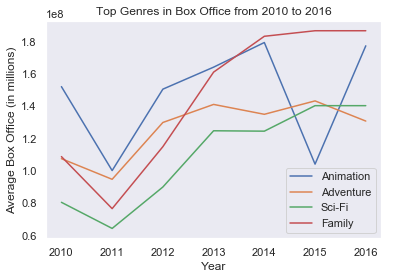

In [39]:
# Line chart to identify top Genres over Years
sns.lineplot(x= Years, y= animation_list, label = "Animation")
sns.lineplot(x= Years, y=adventure_list, label = "Adventure")
sns.lineplot(x= Years, y=scifi_list, label = "Sci-Fi")
sns.lineplot(x= Years, y=family_list, label = "Family")

# Add labels to the x and y axes
plt.title("Top Genres in Box Office from 2010 to 2016")
plt.xlabel("Year")
plt.ylabel("Average Box Office (in millions)")

# Set your grid
plt.grid()

# Save the figure and display it
plt.savefig("Top_Genres_Years.png")

# Show figure
plt.show()

## Observations

   1) The top four genres based on box office revenue were animation, adventure, sci-fi, and fantasy. 
   
   2) Animation has the lowest box office revenue in 2015 compared to the other top genres. 
   
   3) Family genre has the lowest box office revenue compared to the other top genres, but it did had a gradual      incline in revenue over the years. 

## Highlight 

 Althought animation was the top genre with the highest box office revenue between 2010 to 2016, it had a lowest box office revenue in 2015 compared to the other top genres. 
